In [ ]:
import pandas as pd
import pickle

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data=pd.read_csv("/content/Crop_recommendation.csv")

In [ ]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
data.shape

(2200, 8)

In [ ]:
data.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [ ]:
x=data.iloc[:,:-1] #features
y=data.iloc[:,-1] #labels

In [ ]:
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [ ]:
y.head()

,label
0,rice
1,rice
2,rice
3,rice
4,rice


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model=RandomForestClassifier()

In [ ]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
predictions=model.predict(x_test)

In [ ]:
accuracy=model.score(x_test,y_test)

In [ ]:
print(accuracy)

0.9931818181818182


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

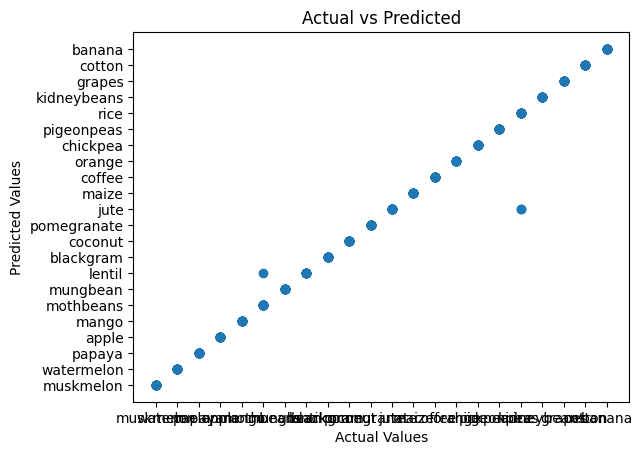

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

In [ ]:
new_features=[[36,95,45,25,85,6.89,299]]
predictions=model.predict(new_features)
print(predictions)

['papaya']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
filename = 'model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)